In [1]:
#Spashtunyar
#DSC650
#Assignment 10

# Assignemnt 10.1a

In [2]:
import string

In [3]:
#Creating a toeknizer
def tokenize(sentence):
    # Split the sentence by spaces
    words = sentence.split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return stripped

In [4]:
sentence = "I need a dummy, in order to remove all. the text and $#21 out of this string!"
tokens = tokenize(sentence)
print(type(tokens))
print(tokens)

<class 'list'>
['I', 'need', 'a', 'dummy', 'in', 'order', 'to', 'remove', 'all', 'the', 'text', 'and', '21', 'out', 'of', 'this', 'string']


# Assigment 10.1C

In [5]:
#(what happened to 10 B? no one knows)

In [6]:
import string
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

2023-05-21 03:13:55.429963: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-21 03:13:55.599954: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-21 03:13:55.602611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 03:13:56.947719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
def onehtencode(data):
    data = array(data)
    print("Received array")
    print(data)
    # one hot encode
    encoded = to_categorical(data)
    return encoded

In [8]:
data = [1, 3, 2, 1, 9, 3, 6, 1, 0, 8]
encodedval = onehtencode(data)
print("One Hot Encoded values")
print(encodedval)

Received array
[1 3 2 1 9 3 6 1 0 8]
One Hot Encoded values
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


# ASSIGNMENT 10.2

In [9]:
#imports
from keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()

In [10]:
pip install pad_sequences

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pad_sequences

In [20]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
from keras_preprocessing.sequence import pad_sequences

In [22]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)
imdb_dir = Path('imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

In [23]:
#Set sample sizes and limits
training_samples = 200
maxlen = 100
max_words = 1000
embedding_dim = 100

training_samples = 200
validation_samples = 10000

In [24]:
# Process the labels of the raw IMDB data
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [25]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [26]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [27]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.2_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

result_model_file = results_dir.joinpath('pre_trained_glove_model.h5')
model.save_weights(result_model_file)

Epoch 1/10
7/7 [==============================] - 2s 181ms/step - loss: 0.6954 - acc: 0.5050 - val_loss: 0.6924 - val_acc: 0.5136
Epoch 2/10
7/7 [==============================] - 1s 152ms/step - loss: 0.5804 - acc: 0.9650 - val_loss: 0.6966 - val_acc: 0.5197
Epoch 3/10
7/7 [==============================] - 1s 131ms/step - loss: 0.4440 - acc: 0.9650 - val_loss: 0.6979 - val_acc: 0.5238
Epoch 4/10
7/7 [==============================] - 1s 134ms/step - loss: 0.2831 - acc: 1.0000 - val_loss: 0.6975 - val_acc: 0.5257
Epoch 5/10
7/7 [==============================] - 1s 125ms/step - loss: 0.1703 - acc: 1.0000 - val_loss: 0.7220 - val_acc: 0.5283
Epoch 6/10
7/7 [==============================] - 1s 144ms/step - loss: 0.1026 - acc: 1.0000 - val_loss: 0.7118 - val_acc: 0.5300
Epoch 7/10
7/7 [==============================] - 1s 138ms/step - loss: 0.0621 - acc: 1.0000 - val_loss: 0.7366 - val_acc: 0.5283
Epoch 8/10
7/7 [==============================] - 1s 144ms/step - loss: 0.0407 - acc: 1.00

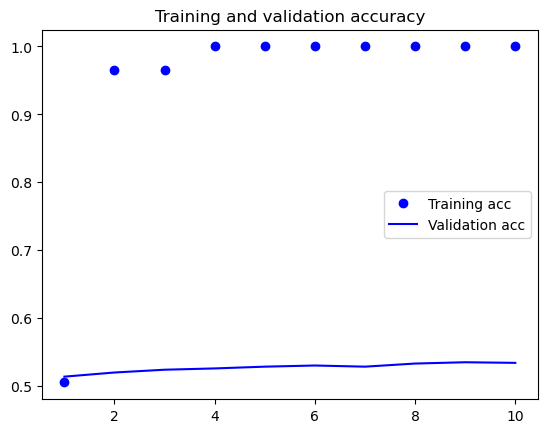

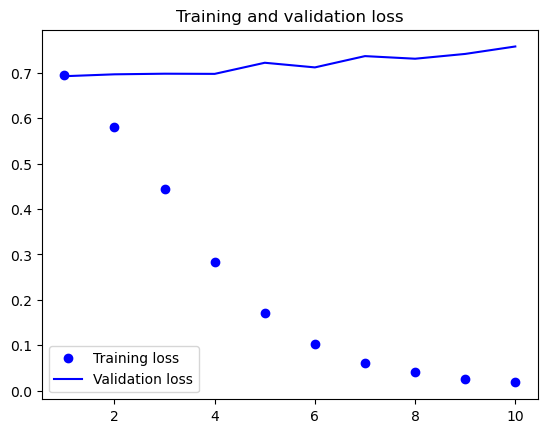

In [29]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.2_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [37]:
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequence = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)
print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))

RuntimeError: resource: Attempting to capture an EagerTensor without building a function.

## Assignment 10-3

In [31]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.preprocessing.text import Tokenizer
import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()
from keras.layers import LSTM
# Needed the following as caused CUDA DNN errors
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from keras.datasets import imdb
from keras.preprocessing import sequence

Instructions for updating:
non-resource variables are not supported in the long term


In [32]:
imdb_dir = Path('/home/jovyan/dsc650/data/external/imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [33]:
max_features = 10000
maxlen = 500
batch_size = 32
max_words = 1000
training_samples = 200
validation_samples = 10000

In [34]:
import os

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [38]:
from keras_preprocessing.sequence import pad_sequences

In [39]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

print('Loading data... ')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Loading data... 
Found 87393 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [40]:
#x_train
input_train = data[:training_samples]
#y_train
y_train = labels[:training_samples]

#x_val
input_test = data[training_samples: training_samples + validation_samples]
#y_val
y_test = labels[training_samples: training_samples + validation_samples]

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (200, 500)
input_test shape: (10000, 500)


In [41]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

result_model_file = results_dir.joinpath('pre_trained_glove_model_LSTM.h5')
model.save_weights(result_model_file)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 200 samples, validate on 10000 samples
Epoch 1/10


2023-05-21 03:19:25.183046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-21 03:19:25.230102: W tensorflow/c/c_api.cc:300] Operation '{name:'training/RMSprop/momentum/Assign' id:666 op device:{requested: '', assigned: ''} def:{{{node training/RMSprop/momentum/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/RMSprop/momentum, training/RMSprop/momentum/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


200/200 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5000

/opt/conda/lib/python3.10/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-21 03:19:27.806061: W tensorflow/c/c_api.cc:300] Operation '{name:'loss/mul' id:257 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_2_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


200/200 [==============================] - 34s 168ms/sample - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6924 - val_acc: 0.5215
Epoch 2/10
200/200 [==============================] - 32s 162ms/sample - loss: 0.6874 - acc: 0.5850 - val_loss: 0.6910 - val_acc: 0.5133
Epoch 3/10
200/200 [==============================] - 33s 163ms/sample - loss: 0.6740 - acc: 0.5900 - val_loss: 0.7549 - val_acc: 0.5051
Epoch 4/10
200/200 [==============================] - 32s 161ms/sample - loss: 0.6323 - acc: 0.6200 - val_loss: 0.6758 - val_acc: 0.5489
Epoch 5/10
200/200 [==============================] - 32s 162ms/sample - loss: 0.6064 - acc: 0.7450 - val_loss: 0.6756 - val_acc: 0.5510
Epoch 6/10
200/200 [==============================] - 32s 162ms/sample - loss: 0.5112 - acc: 0.8050 - val_loss: 0.6522 - val_acc: 0.6463
Epoch 7/10
200/200 [==============================] - 33s 163ms/sample - loss: 0.5148 - acc: 0.9100 - val_loss: 0.6524 - val_acc: 0.6319
Epoch 8/10
200/200 [==============================] 

In [42]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.3_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

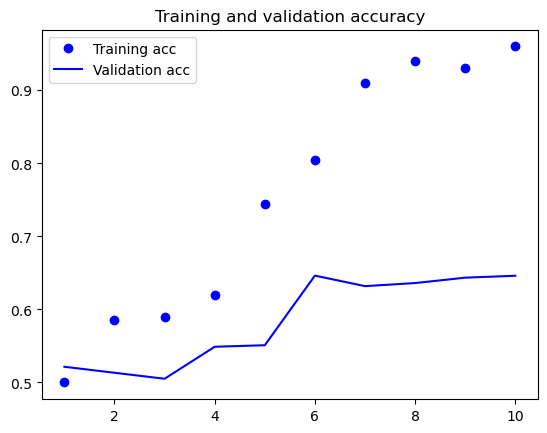

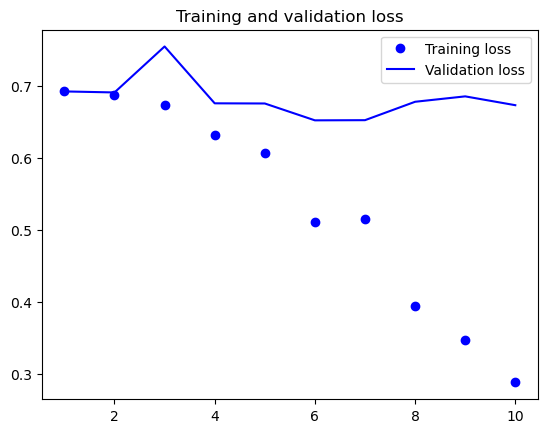

In [43]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.3_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

## Assignment 10-4

In [44]:
#1D Covnet

In [45]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

In [50]:
from keras.models import Sequential
from keras import layers
from keras_preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence
from contextlib import redirect_stdout
from pathlib import Path
import time
start_time = time.time()

In [51]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [53]:
max_features = 10000
max_len = 500

print('Loading data ...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data ...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [54]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                

In [55]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10


2023-05-21 03:28:47.887893: W tensorflow/c/c_api.cc:300] Operation '{name:'training_2/RMSprop/conv1d/kernel/rms/Assign' id:1246 op device:{requested: '', assigned: ''} def:{{{node training_2/RMSprop/conv1d/kernel/rms/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/RMSprop/conv1d/kernel/rms, training_2/RMSprop/conv1d/kernel/rms/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


19968/20000 [============================>.] - ETA: 0s - loss: 0.7133 - acc: 0.5351

2023-05-21 03:28:58.406197: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_1/mul' id:1013 op device:{requested: '', assigned: ''} def:{{{node loss_1/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_1/mul/x, loss_1/dense_3_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


20000/20000 [==============================] - 11s 545us/sample - loss: 0.7133 - acc: 0.5350 - val_loss: 0.6823 - val_acc: 0.5668
Epoch 2/10
20000/20000 [==============================] - 10s 516us/sample - loss: 0.6596 - acc: 0.6763 - val_loss: 0.6579 - val_acc: 0.6678
Epoch 3/10
20000/20000 [==============================] - 10s 520us/sample - loss: 0.6125 - acc: 0.7630 - val_loss: 0.6009 - val_acc: 0.7446
Epoch 4/10
20000/20000 [==============================] - 10s 516us/sample - loss: 0.5181 - acc: 0.8098 - val_loss: 0.4924 - val_acc: 0.8010
Epoch 5/10
20000/20000 [==============================] - 10s 514us/sample - loss: 0.4107 - acc: 0.8497 - val_loss: 0.4288 - val_acc: 0.8284
Epoch 6/10
20000/20000 [==============================] - 10s 519us/sample - loss: 0.3395 - acc: 0.8769 - val_loss: 0.4104 - val_acc: 0.8486
Epoch 7/10
20000/20000 [==============================] - 10s 509us/sample - loss: 0.2941 - acc: 0.8956 - val_loss: 0.4050 - val_acc: 0.8534
Epoch 8/10
20000/20000 [

In [56]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.4_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [57]:
result_model_file = results_dir.joinpath('pre_trained_glove_model_1D_Convnet.h5')
model.save_weights(result_model_file)

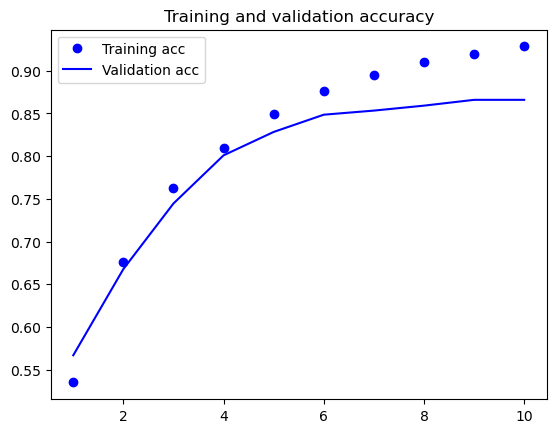

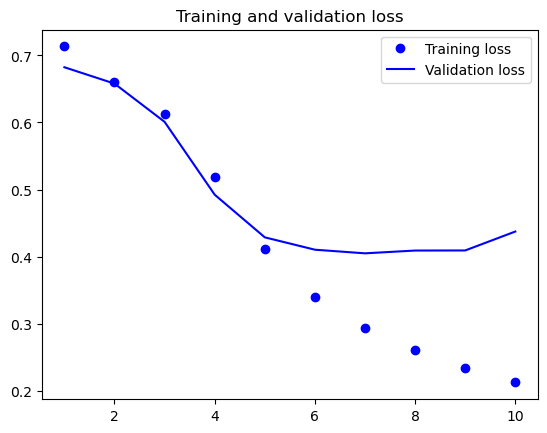

In [58]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.4_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [59]:
#save the model performance metrics and training and validation accuracy curves in the results/model_2 direc
model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)


[0.45278230883598325, 0.86232]
